### Import Dependencies ###

In [ ]:
import pandas as pd
import seaborn as sns

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

### Load Data ###

In [ ]:
# Load the dataset
df = pd.read_csv('IMDB Dataset.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
# Check df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
# Check for missing values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

### EDA ###

<Axes: ylabel='sentiment'>

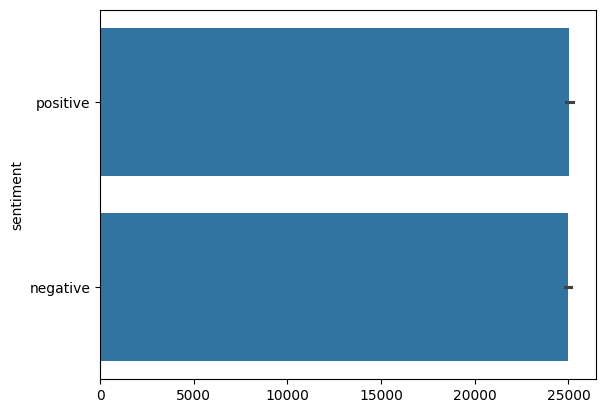

In [ ]:
# Bar plot of the target variable
sns.barplot(df['sentiment'])

### Cleaning ###

In [ ]:
# Lowercase all reviews
df['review'] = df['review'].apply(lambda x: x.lower())

# Remove special characters
df['review'] = df['review'].str.replace('[^a-z0-9\s]', '')

# Remove redundant whitespaces
df['review'] = df['review'].apply(lambda x: ' '.join(x.split()))

# Remove stopwords
stop_words = set(stopwords.words('english'))
df['review'] = df['review'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

# Stemming
porter = PorterStemmer()
df['review'] = df['review'].apply(lambda x: ' '.join([porter.stem(word) for word in word_tokenize(x)]))

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Barry\AppData\Local\Temp\ipykernel_27084\3685267487.py:5: SyntaxWarning: invalid escape sequence '\s'
  df['review'] = df['review'].str.replace('[^a-z0-9\s]', '')


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(' '.join(df['review']))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
# Split the dataset
from sklearn.model_selection import train_test_split

X = df['review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the reviews
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB


clf = MultinomialNB()
clf.fit(X_train, y_train)

# Evaluate the classifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.85      0.87      0.86      4961
    positive       0.87      0.85      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [ ]:
# Train a logistic regression classifier
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

# Evaluate the classifier
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.90      0.87      0.89      4961
    positive       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

